In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst[np.where(X_tst.sum(-1) >= 1)] = 0.0
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg = additive_1x2_uniform_triangle_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_triangle_01_generator.Generator
clip_op_lambda = (lambda x: clip_op_triangle_01(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000


2019-02-26 22:57:26,261:INFO:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000
2019-02-26 22:57:30,239:INFO:TEST BATCH-0: t = 3.9390, Revenue: 0.247435, Regret: 0.000007, IRP: 0.000000
2019-02-26 22:57:30,248:INFO:TEST BATCH-1: t = 3.9436, Revenue: 0.247751, Regret: 0.000015, IRP: 0.000000
2019-02-26 22:57:30,255:INFO:TEST BATCH-2: t = 3.9478, Revenue: 0.248070, Regret: 0.000003, IRP: 0.000000
2019-02-26 22:57:30,262:INFO:TEST BATCH-3: t = 3.9519, Revenue: 0.248392, Regret: 0.000013, IRP: 0.000000
2019-02-26 22:57:30,269:INFO:TEST BATCH-4: t = 3.9559, Revenue: 0.248713, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:57:30,276:INFO:TEST BATCH-5: t = 3.9598, Revenue: 0.249032, Regret: 0.000009, IRP: 0.000000
2019-02-26 22:57:30,282:INFO:TEST BATCH-6: t = 3.9638, Revenue: 0.249348, Regret: 0.000021, IRP: 0.000000
2019-02-26 22:57:30,289:INFO:TEST BATCH-7: t = 3.9677, Revenue: 0.249658, Regret: 0.000005, IRP: 0.000000
2019-02-26 22:57:30,296:INFO:TEST BATCH-8:

2019-02-26 22:57:30,794:INFO:TEST BATCH-76: t = 4.2839, Revenue: 0.257027, Regret: 0.000073, IRP: 0.000000
2019-02-26 22:57:30,800:INFO:TEST BATCH-77: t = 4.2885, Revenue: 0.257053, Regret: 0.000076, IRP: 0.000000
2019-02-26 22:57:30,808:INFO:TEST BATCH-78: t = 4.2949, Revenue: 0.257069, Regret: 0.000043, IRP: 0.000000
2019-02-26 22:57:30,813:INFO:TEST BATCH-79: t = 4.2990, Revenue: 0.257075, Regret: 0.000064, IRP: 0.000000
2019-02-26 22:57:30,819:INFO:TEST BATCH-80: t = 4.3035, Revenue: 0.257071, Regret: 0.000062, IRP: 0.000000
2019-02-26 22:57:30,825:INFO:TEST BATCH-81: t = 4.3084, Revenue: 0.257056, Regret: 0.000033, IRP: 0.000000
2019-02-26 22:57:30,832:INFO:TEST BATCH-82: t = 4.3147, Revenue: 0.257028, Regret: 0.000007, IRP: 0.000000
2019-02-26 22:57:30,854:INFO:TEST BATCH-83: t = 4.3348, Revenue: 0.256985, Regret: 0.000038, IRP: 0.000000
2019-02-26 22:57:30,864:INFO:TEST BATCH-84: t = 4.3437, Revenue: 0.256928, Regret: 0.000014, IRP: 0.000000
2019-02-26 22:57:30,871:INFO:TEST BAT

2019-02-26 22:57:31,295:INFO:TEST BATCH-153: t = 4.7127, Revenue: 0.134461, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:57:31,302:INFO:TEST BATCH-154: t = 4.7179, Revenue: 0.131631, Regret: 0.000014, IRP: 0.000000
2019-02-26 22:57:31,307:INFO:TEST BATCH-155: t = 4.7222, Revenue: 0.128798, Regret: 0.000014, IRP: 0.000000
2019-02-26 22:57:31,312:INFO:TEST BATCH-156: t = 4.7264, Revenue: 0.125962, Regret: 0.000007, IRP: 0.000000
2019-02-26 22:57:31,318:INFO:TEST BATCH-157: t = 4.7309, Revenue: 0.123124, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:57:31,323:INFO:TEST BATCH-158: t = 4.7354, Revenue: 0.120283, Regret: 0.000001, IRP: 0.000000
2019-02-26 22:57:31,336:INFO:TEST BATCH-159: t = 4.7475, Revenue: 0.117440, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:57:31,341:INFO:TEST BATCH-160: t = 4.7519, Revenue: 0.114596, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:57:31,347:INFO:TEST BATCH-161: t = 4.7570, Revenue: 0.111749, Regret: 0.000000, IRP: 0.000000
2019-02-26 22:57:31,352:INFO

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

In [6]:
from copy import copy
palette = copy(plt.cm.YlOrRd)
palette.set_over('w')
x = np.linspace(0, 1.0, D)
m = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1).reshape(D,D,2)
mask = m.sum(-1)>1.0

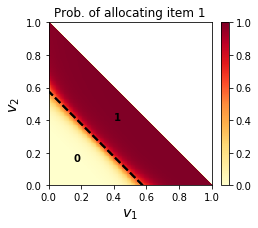

In [7]:
x1 = np.sqrt(1.0/3.0)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a1 = alloc[:, :, 0]
a1[mask] = 10.0
img = ax.imshow(a1[::-1,:], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)

plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

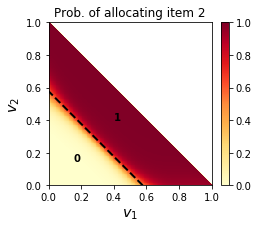

In [8]:
x1 = np.sqrt(1.0/3.0)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a2 = alloc[:, :, 1]
a2[mask] = 10.0
img = ax.imshow(a2[::-1, :], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)


plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)